# FX Trading Data Analysis

## Part 1 - Year 2015

### Introduction

I traded in the financial markets, mainly currencies and commodities, in year 2015 and 2016. I also traded in the beginning parts of 2017, till March of that year to be precise, but I was on the dwindling stage of my trading adventure then. So I will not bother to analyse it here.

What I would like to do is analyse the trades for 2015 (Part 1), 2016 (Part 2), and do a year-on-year analysis between those two years (Part 3). As you will see, I performed miserably in 2015. I got hit by the [Swiss Central Bank financial tsunami on 15th Jan 2015](http://www.bbc.com/news/business-30829917). Switzerland abandoned the Euro cap at 1.20. This meant my 1 Euro could buy 1.20 Swiss Francs prior to that day. After that day, no more. Eurozone was doing Quantitative Easing - laymans term would be printing money, which means European Central Bank (ECB) wanted EUR to fall, because European economy was not doing great, but keeping up with the peg would drag the strong Swiss Franc down, which was becoming untenable.

With hindsight, it all made sense. But as they say, Hindsight Fund Management would always perform great.

### Reading in Trading Data

Let's import the relevant Python modules to do the analysis. I would be using Pandas and Numpy for working with the data.  For data visualisation, I would be using Matplotlib and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The trades are in an excel file. I have done some preprocessing to give my analysis a helping hand.

In [2]:
trades_2015 = pd.read_excel('Trades/Trades 2015.xlsx',sheetname='Trades')

I am assigning the trades to df - short for dataframe, for ease of use in the coming steps.

In [3]:
df = trades_2015

### Initial Checks

Let's take a peek into the trades.

The column names should be self explanatory. I will throw in some light on Gross P/L, Rollover and Net P/L a little later. 

Note: B/S stands for Buy or Sell. An 'S' would mean I was perfoming a Sell operation on the currency pair.

In [4]:
df.head()

,Ticket #,Symbol,Volume,Open,Close,B/S,Sold,Bought,Gross P/L,Rollover,Net P/L,Created By
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,1/5/15 11:35 AM,S,143.431,143.409,0.24,0.00,0.24,7510123597
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,1/6/15 10:02 AM,S,143.389,141.540,51.20,0.00,51.20,7510123597
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,1/7/15 12:08 AM,S,143.389,141.036,65.45,0.00,65.45,7510123597
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,1/6/15 10:03 AM,S,118.804,117.807,27.61,-0.08,27.53,7510123597
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,1/7/15 12:09 AM,S,118.804,117.437,38.02,-0.16,37.86,7510123597


Let's see how many trades are there. 

And we can see that there are 2120 rows. So I did 2120 trades in 2015.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 12 columns):
Ticket #      2120 non-null int64
Symbol        2120 non-null object
Volume        2120 non-null int64
Open          2120 non-null object
Close         2120 non-null object
B/S           2120 non-null object
Sold          2120 non-null float64
Bought        2120 non-null float64
Gross P/L     2120 non-null float64
Rollover      2120 non-null float64
Net P/L       2120 non-null float64
Created By    2120 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 198.8+ KB


The column names are easier to use if there are no spaces between the words. So, for example, I want NetPnL instead of Net P/L. So let's take care of that. (Net P/L means Net Profit or Loss, which is also commonly abbreviated as Net PnL)

And also, 'Created By' is referring to the account numbers. Another column name that I wanted changed was Ticket # to TicketId.

In [6]:
df.rename(columns={'Ticket #':'TicketId',
                   'Gross P/L':'GrossPnL','Net P/L':'NetPnL',
                   'Created By':'Account'},
          inplace=True)

Let's verify that the column names are changed as expected.

And it looks better.

In [7]:
df.head()

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,1/5/15 11:35 AM,S,143.431,143.409,0.24,0.00,0.24,7510123597
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,1/6/15 10:02 AM,S,143.389,141.540,51.20,0.00,51.20,7510123597
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,1/7/15 12:08 AM,S,143.389,141.036,65.45,0.00,65.45,7510123597
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,1/6/15 10:03 AM,S,118.804,117.807,27.61,-0.08,27.53,7510123597
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,1/7/15 12:09 AM,S,118.804,117.437,38.02,-0.16,37.86,7510123597


I traded using 3 different accounts in 2015. So let's check that.

And we can see that there are 3 unique account numbers which is what we want to see.

In [8]:
df.Account.unique()

array([7510123597, 7510123538, 7510117642], dtype=int64)

Let's see the universe of currencies or markets that I traded in.

We see that there were quite a few of them I traded in, 44 to be precise.

In [9]:
df.Symbol.unique()

array(['EUR/JPY', 'CHF/JPY', 'GBP/AUD', 'GBP/JPY', 'EUR/AUD', 'EUR/CAD',
       'AUD/JPY', 'GBP/CAD', 'EUR/USD', 'USD/JPY', 'AUD/USD', 'USD/CAD',
       'GBP/USD', 'EUR/GBP', 'NZD/USD', 'UKOil', 'USOil', 'UK100',
       'JPN225', 'USDOLLAR', 'XAU/USD', 'SPX500', 'EUSTX50', 'USD/ZAR',
       'USD/TRY', 'USD/NOK', 'GBP/CHF', 'EUR/NZD', 'GBP/NZD', 'ZAR/JPY',
       'EUR/NOK', 'EUR/TRY', 'AUD/NZD', 'TRY/JPY', 'NZD/JPY', 'NZD/CAD',
       'XPT/USD', 'USD/CHF', 'XAG/USD', 'CAD/JPY', 'NZD/CHF', 'XPD/USD',
       'AUD/CHF', 'USD/MXN'], dtype=object)

In [10]:
len(df.Symbol.unique())

44

Next thing we might want to see - how much is the actual Profit and Loss for that year. 

Note: Gross PnL is PnL without Rollover. Rollover is the carry over interest I either pay or receive to leave my positions overnight.

We see that I lost around £5,000 in total. To break the suspense I can say that I began the year with £10,000, I put in another £1,000 during the year. So, out of £11,000, I lost £5,000 - that is saying I lost almost half my capital.

And we will see that most of the losses came from one day - 15th Jan 2015 on a particular currency.

In [11]:
df.agg({'GrossPnL':sum,
       'Rollover':sum,
       'NetPnL':sum})

GrossPnL   -4854.00
Rollover    -227.03
NetPnL     -5081.03
dtype: float64

### Analysis of Distribution of PnLs

We might want to see how are PnL distributed. So lets take a look at that.

We see almost instantly that there are some outliers in my PnL. Very bad outliers. Losing to the tune of 1000 £s.

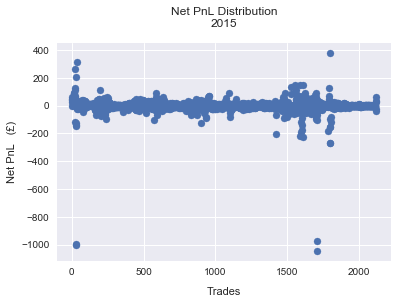

In [12]:
plt.scatter(df.NetPnL.index, df.NetPnL)
plt.title('Net PnL Distribution\n2015', y=1.05)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Trades', labelpad=10)

Lets put in some alpha (=0.5) to see a better pictorial description of the distribution.

We see that most of the PnLs are centred around 0 (this is £s). This reminds of Bernouli's law of large numbers. If we bet on casino an infinite amount of times, we will have 0 return. The positives and negatives will cancel out.

And that seems to be what I am seeing here. I did many trades. I made money and lost money. But in the end, what I made and lost cancelled out, leaving me where I started, except for a few hard hits that Swiss Franc trades gave me.

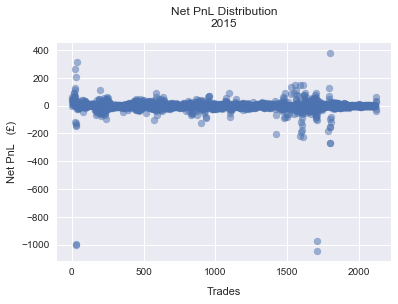

In [13]:
plt.scatter(df.NetPnL.index, df.NetPnL, alpha=0.5)
plt.title('Net PnL Distribution\n2015', y=1.05)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Trades', labelpad=10)

Another good one to see a pictorial view is to use Seaborn boxplot.

Here we can clearly see the outliers. The max loss is around £1000 and max profit is around £400, and this is the range of my PnLs.

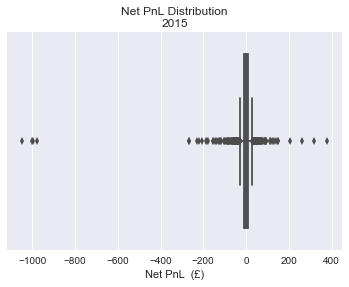

In [14]:
ax = sns.boxplot(df.NetPnL)
ax.set_title('Net PnL Distribution\n2015')
ax.set_xlabel('Net PnL  (£)')             

We can get a numeric description of the PnL distribution as well. 

And it reflects what we have seen visually so far.

Interesting thing to note is the mean and standard deviation. The mean is around -£2 and standard deviation is around £50. This is saying that in most of my trades I made either around £50 or lost around £50.

In [15]:
df.NetPnL.describe()

count    2120.000000
mean       -2.396712
std        52.893752
min     -1046.040000
25%        -7.805000
50%        -0.210000
75%         7.152500
max       377.580000
Name: NetPnL, dtype: float64

### Analysis of Individual Trades with Max PnLs

Lets say we want to see the 10 trades with the greatest losses. Greatest have a positive connotation but it this case it is negative, sadly.

We see that there are big losses of around £1,000 on 4 trades. And they all happened on the same day - 15th Jan, and involved  Swiss Franc (CHF).

I had 2 positions each on USD/CHF and CHF/JPY that I had initiated the previous day, [completely unaware of the plot that was going on inside the closed doors of Swiss Central Bank](https://www.reuters.com/article/us-markets-franc/swiss-franc-jumps-30-percent-after-swiss-national-bank-dumps-euro-ceiling-idUSKBN0KO16Y20150115).

In total, I would end up losing around £4,000 that day. From a capital of £10,000, that loss gave me a drawdown of 40%. To say that it gave me some shock would be putting it mildly.

In [16]:
df.sort_values('NetPnL').head(10).reset_index(drop=True)

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
0,17495429,USD/CHF,10000,1/14/15 10:00 AM,1/15/15 11:03 AM,B,0.88221,1.02271,-1046.16,0.12,-1046.04,7510123538
1,17477111,CHF/JPY,10000,1/14/15 10:21 AM,1/15/15 10:26 AM,S,114.53600,132.35700,-1002.83,-0.08,-1002.91,7510123597
2,17494716,CHF/JPY,10000,1/14/15 10:21 AM,1/15/15 11:04 AM,S,114.53600,132.19000,-995.23,-0.08,-995.31,7510123597
3,17476684,USD/CHF,10000,1/14/15 10:00 AM,1/15/15 10:43 AM,B,0.89044,1.02271,-976.62,0.12,-976.50,7510123538
4,19668181,GBP/JPY,10000,7/8/15 8:13 PM,7/10/15 7:21 PM,S,185.26900,190.35300,-267.08,-1.08,-268.16,7510123538
5,19696635,GBP/JPY,10000,7/8/15 8:13 PM,7/10/15 7:22 PM,S,185.26900,190.31100,-264.93,-1.08,-266.01,7510123538
6,21355878,EUR/TRY,9000,12/3/15 10:07 AM,12/3/15 4:30 PM,S,3.04646,3.15687,-227.43,0.00,-227.43,7510123597
7,21322287,EUR/NZD,11000,12/1/15 9:56 AM,12/3/15 5:49 PM,S,1.59224,1.63794,-221.84,1.57,-220.27,7510123597
8,20433935,GBP/JPY,15000,9/15/15 7:26 AM,9/17/15 5:43 AM,S,184.55900,187.09600,-203.40,-1.68,-205.08,7510123597
9,21355633,EUR/USD,8000,12/3/15 9:51 AM,12/3/15 4:32 PM,S,1.05584,1.09106,-186.69,0.00,-186.69,7510123597


To put on some lighter mood, lets take a look at the trades with the greatest profits.

We see that I made around £400 with GBP/JPY sometime in August (the trade was opened on July 7th, and closed on August 8th, so the trade ran for about a month).

In [17]:
df.sort_values('NetPnL', ascending=False).head(10).reset_index(drop=True)

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
0,19650459,GBP/JPY,20000,7/7/15 6:24 PM,7/8/15 8:13 PM,S,188.78100,185.27700,378.24,-0.66,377.58,7510123538
1,17478608,EUR/AUD,20000,1/14/15 12:13 PM,1/15/15 12:41 PM,S,1.44596,1.41719,312.19,3.68,315.87,7510123597
2,17461246,EUR/JPY,20000,1/13/15 10:02 AM,1/14/15 10:08 AM,S,139.97800,137.65400,261.27,0.00,261.27,7510123597
3,17476913,EUR/CAD,20000,1/14/15 10:09 AM,1/15/15 12:41 PM,S,1.40641,1.38799,204.08,1.36,205.44,7510123597
4,21322267,GBP/AUD,10000,12/1/15 9:55 AM,12/3/15 9:20 AM,S,2.06884,2.03842,149.23,1.22,150.45,7510123597
5,21370549,NZD/CAD,10000,12/3/15 6:40 PM,12/11/15 5:39 PM,B,0.92130,0.89071,146.46,1.44,147.90,7510123597
6,21179134,EUR/AUD,10000,11/17/15 9:25 AM,11/20/15 5:41 PM,S,1.50119,1.47099,143.92,1.65,145.57,7510123597
7,21026607,USD/JPY,16000,11/4/15 8:42 AM,11/13/15 9:12 AM,B,122.77300,121.19600,135.02,0.35,135.37,7510123597
8,17461232,GBP/JPY,20000,1/13/15 10:02 AM,1/14/15 10:08 AM,S,179.05400,177.92100,127.36,-0.48,126.88,7510123597
9,19635465,GBP/JPY,10000,7/6/15 6:49 PM,7/7/15 6:24 PM,S,191.16100,188.77000,126.66,-0.60,126.06,7510123538


Lets plot a graph for the trades with max profits and losses.

The graph clearly shows the negative fat tails from CHF.

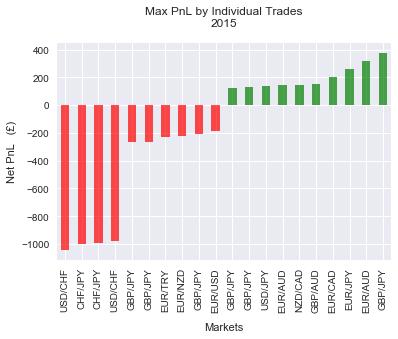

In [18]:
df_ccy_maxPnL = pd.concat([df.sort_values('NetPnL').head(10), df.sort_values('NetPnL').tail(10)])

ax = df_ccy_maxPnL.plot.bar('Symbol','NetPnL',
                      color=np.sign(df_ccy_maxPnL.NetPnL).map({-1:'r', 1:'g'}),
                      legend=False,
                      alpha=0.7)
ax.set_title('Max PnL by Individual Trades\n2015', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Markets', labelpad=10)

Lets say we want to see the distribution of PnLs across currencies.

Lets plot a graph for that. Now its becoming clear the losses on CHFJPY and USDCHF.

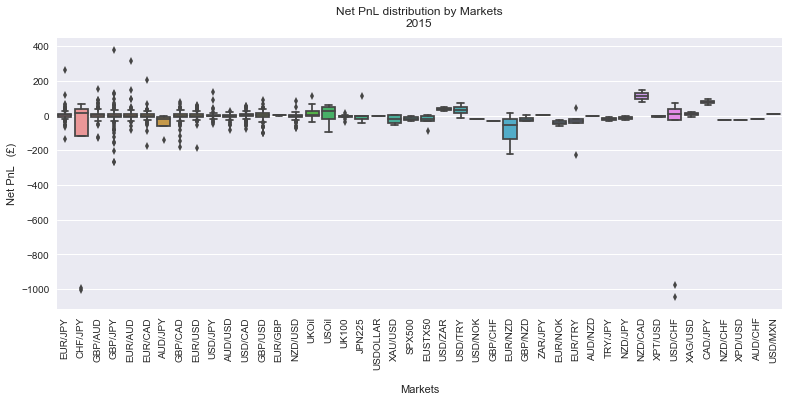

In [19]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.boxplot(data=df, x='Symbol', y='NetPnL', ax=ax)
plt.xticks(rotation=90)
plt.title('Net PnL distribution by Markets\n2015', y=1.02)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Markets', labelpad=15)

### Analysis of Aggregate PnLs by Markets

Below is a list of the 10 greatest losses aggregated on currency pairs.

The winner - from the bottom, is CHFJPY, followed by USDCHF. Both are from Switzerland.

In [20]:
df_ccyPnL = df.groupby('Symbol', as_index=False)['NetPnL'].sum()
df_ccyPnL.sort_values('NetPnL').head(10).reset_index(drop=True)

,Symbol,NetPnL
0,CHF/JPY,-1934.51
1,USD/CHF,-1851.32
2,GBP/JPY,-799.06
3,GBP/CAD,-616.57
4,NZD/USD,-498.79
5,AUD/USD,-329.97
6,EUR/TRY,-284.14
7,EUR/NZD,-263.98
8,AUD/JPY,-179.77
9,EUSTX50,-160.35


Below is a list of the 10 greatest profits aggregated on currency pairs.

Here the winner is EURAUD - I should thank Eurozone and the Aussies. EURJPY followed closely in second position. I did enjoy trading Yen pairs, they move.

In [21]:
df_ccyPnL.sort_values('NetPnL', ascending=False).head(10).reset_index(drop=True)

,Symbol,NetPnL
0,EUR/AUD,551.95
1,EUR/JPY,451.70
2,GBP/AUD,433.58
3,NZD/CAD,224.34
4,UKOil,205.31
5,CAD/JPY,155.18
6,USD/TRY,121.76
7,EUR/USD,85.26
8,USD/ZAR,72.56
9,EUR/CAD,63.49


Below is a plot of the aggregate PnLs by Markets.

I am using Markets here rather than currency pairs because we see that I traded in UKOil and made some money on it.

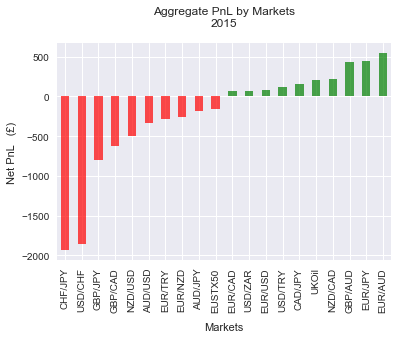

In [22]:
df_ccyPnL_Sum = pd.concat([df_ccyPnL.sort_values('NetPnL').head(10), df_ccyPnL.sort_values('NetPnL').tail(10)])

ax = df_ccyPnL_Sum.plot.bar('Symbol','NetPnL',
                        color=np.sign(df_ccyPnL_Sum.NetPnL).map({-1:'r', 1:'g'}),
                        legend=False,
                        alpha=0.7)
ax.set_title('Aggregate PnL by Markets\n2015', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Markets', labelpad=10)

### Analysis of Monthly PnLs

Lets plot a graph for the distribution of PnLs by Month.

We see that big losses came from Jan. These were the CHF trades. Otherwise my PnLs ranged between £400 and -£400. There is even more drag on the positive side.

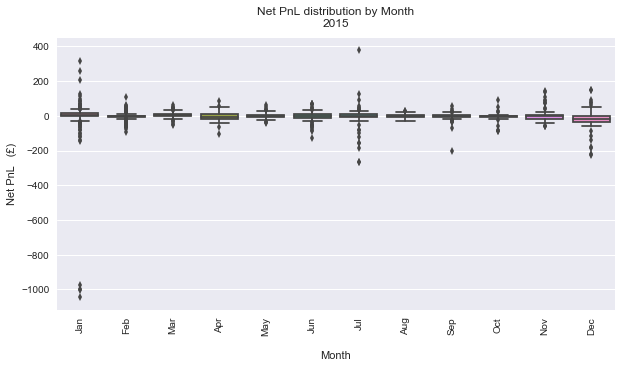

In [23]:
df.Close = pd.to_datetime(df.Close)
df['Month'] = df.Close.map(lambda x: x.strftime('%b'))
df['Month'] = df.Month.astype('category', categories=
                           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='Month', y='NetPnL', ax=ax)
plt.xticks(rotation=90)
plt.title('Net PnL distribution by Month\n2015', y=1.02)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Month', labelpad=15)

Lets see how much I made or lost in each month.

We see again that the biggest losses was in Jan - losing around £2000. So even though I had lost around £4000 on 15th Jan, looks I recouped half of the losses.

I continued to lose around £1000 in Feb, then it calmed down, till in December, looks like I slightly lost control, and ended up losing around £1400.

In [24]:
df_monthPnL = df.groupby('Month', as_index=False)['NetPnL'].sum()
df_monthPnL

,Month,NetPnL
0,Jan,-1974.01
1,Feb,-1064.58
2,Mar,894.90
3,Apr,-343.01
4,May,58.94
5,Jun,-281.42
6,Jul,-567.34
7,Aug,-231.39
8,Sep,-255.54
9,Oct,-225.15


The previous table was all numbers. Lets add in come colour.

We see the difference visually - the losses jump out but also the profits. The eyes can discern at once that out of the 12 months in 2015, there were losses in 9 months, and profits in only 3 months.

In [25]:
def colorMap(x):
    return 'color: %s' % ('red' if x < 0 else 'white' if x == 0 else 'green')
    
df_monthPnL.style.applymap(colorMap, subset='NetPnL')

,Month,NetPnL
0,Jan,-1974.01
1,Feb,-1064.58
2,Mar,894.9
3,Apr,-343.01
4,May,58.94
5,Jun,-281.42
6,Jul,-567.34
7,Aug,-231.39
8,Sep,-255.54
9,Oct,-225.15


How about we plot the PnLs by Months in a graph?

And below is how we do that. There is something about visual display that numbers are just not able to convey.

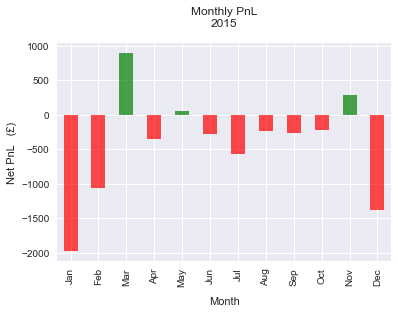

In [26]:
ax = df_monthPnL.plot.bar('Month','NetPnL',
                   color=np.sign(df_monthPnL.NetPnL).map({-1:'r', 1:'g'}),
                   alpha=0.7,
                   legend=False)
ax.set_title('Monthly PnL\n2015', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Month', labelpad=10)

Now to dig in slightly deeper, lets order the PnLs from the greatest losses to the greatest profits, and see them as a table and also in graph.

I particularly like the way it becomes displayed in a graph.

In [27]:
df_monthPnL_sorted = df_monthPnL.sort_values('NetPnL').reset_index(drop=True)

df_monthPnL_sorted.style.applymap(colorMap, subset='NetPnL')

,Month,NetPnL
0,Jan,-1974.01
1,Dec,-1377.15
2,Feb,-1064.58
3,Jul,-567.34
4,Apr,-343.01
5,Jun,-281.42
6,Sep,-255.54
7,Aug,-231.39
8,Oct,-225.15
9,May,58.94


A good thing about a display such as this is that we can see that the max losses were around slightly less than £2000, it decreased, and decreased, then the profits came into view, the profits increased, and it peaked at around slightly less than £1000.

So all the information can be grasped at a look.

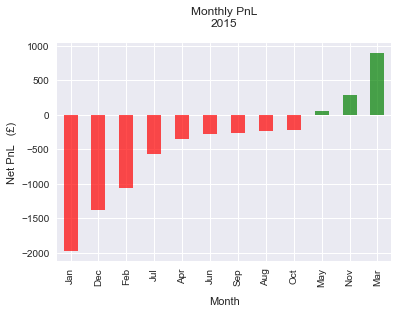

In [28]:
ax = df_monthPnL_sorted.plot.bar('Month','NetPnL',
                   color=np.sign(df_monthPnL_sorted.NetPnL).map({-1:'r', 1:'g'}),
                   alpha=0.7,
                   legend=False)
ax.set_title('Monthly PnL\n2015', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Month', labelpad=10)

### Analysis of PnLs by Markets and Months

This is where pivot tables come in handy. I had used pivot tables in Microsoft Excel. But having able to use the same functionalities with pandas, I found it amazing.

Lets say I want to see the greatest losses by Currencies, but I want to see how much losses came from each month.

Below is how we do that.

We see that I didn't trade CHFJPY or USDCHF after Jan. I became afraid of touching Swiss Franc. But also spreads became very high after 15 Jan.

Some currency pairs - like GBPJPY, GBPCAD, AUDUSD, I continued to trade throughout the year.

I dabbled in stock indices - EUSTX50, towards the end of the year.

Dec seems to be another month where I was trading heavily across lots of currencies and markets. Smells like over trading. No wonder Dec gave me a big loss.

In [29]:
df_pt_ccy_month = df.pivot_table(values='NetPnL', index='Symbol', columns='Month', aggfunc=sum,
                      margins=True, margins_name='Total').fillna(0)
df_pt_ccy_month.drop('Total', axis=0, inplace=True)
cols = df_pt_ccy_month.columns

df_ccy_losses = df_pt_ccy_month.sort_values('Total').head(10)
df_ccy_losses.style.applymap(colorMap, subset=cols)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Symbol,,,,,,,,,,,,,
CHF/JPY,-1934.51,0,0,0,0,0,0,0,0,0,0,0,-1934.51
USD/CHF,-1831.17,0,0,0,0,0,0,0,0,0,0,-20.15,-1851.32
GBP/JPY,221.49,47.48,69.79,-86.64,-10.93,-43.29,-577.16,-35.69,-155.78,-76.51,-119.11,-32.71,-799.06
GBP/CAD,-126.18,-209.42,-13.41,-7.33,-73.36,-32.37,-38.63,-6.07,-1.69,-60.77,-51.56,4.22,-616.57
NZD/USD,-171.32,-245.47,47.57,-77.25,17.84,-9.66,4.68,-37.85,-18.84,0,-8.49,0,-498.79
AUD/USD,-111.84,-179.88,40.72,-112.35,61.05,-29.92,46.94,-36.29,19.77,-12.86,-15.31,0,-329.97
EUR/TRY,0,0,0,0,0,0,0,0,0,0,0,-284.14,-284.14
EUR/NZD,0,0,0,0,0,0,0,0,0,0,12.12,-276.1,-263.98
AUD/JPY,-147.5,0,0,0,0,0,0,0,0,0,0,-32.27,-179.77


And to end this analysis for 2015, lets see how much profits or losses came from each month for the currencies or markets with the greatest profits. We will take a look at the top 10.

First thing is - its nice to see more greens than red. It does boost morale.

We notice that with EURAUD, it gave the greatest profits, but most of its profits came from one month - Jan. I shall let you deduce what that means.

In [30]:
df_ccy_profits = df_pt_ccy_month.sort_values('Total', ascending=False).head(10)
df_ccy_profits.style.applymap(colorMap, subset=cols)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Symbol,,,,,,,,,,,,,
EUR/AUD,504.64,33.97,58.43,65.59,-98.6,-49.98,-13.37,-18.55,-1.58,-96.96,227.63,-59.27,551.95
EUR/JPY,560,-156.43,179.27,-41.89,84.87,23.46,-35.89,-50.05,35.77,-4.25,20.04,-163.2,451.7
GBP/AUD,283.01,61.91,6.65,-4.93,-12.02,-99.5,40.56,-118.56,-41.15,108.79,58.37,150.45,433.58
NZD/CAD,0,0,0,0,0,0,0,0,0,0,0,224.34,224.34
UKOil,0,154.93,29.04,0,0,0,0,0,0,21.34,0,0,205.31
CAD/JPY,0,0,0,0,0,0,0,0,0,0,0,155.18,155.18
USD/TRY,0,0,0,0,0,0,0,0,0,0,113.93,7.83,121.76
EUR/USD,310,8.67,249.51,-123.6,9.2,-60.54,-29.5,-40.72,-24.23,0,-1.02,-212.51,85.26
USD/ZAR,0,0,0,0,0,0,0,0,0,0,72.56,0,72.56
